In [1]:
from cg.conj_grad import Equation

import numpy as np

from scipy.linalg import pascal

import timeit
import matplotlib.pyplot as plt

In [2]:
def random_equation(n=5, add_disturb=False):
    rand_a = pascal(n)
    rand_a = np.asarray(rand_a, dtype=float)

    if add_disturb:
        delta = np.random.rand(n, n)
        delta = delta * delta.transpose()
        rand_a += delta

    rand_b = np.random.rand(n)

    return np.asmatrix(rand_a), np.asarray(rand_b).ravel()


def time_solve(a, b, naive=True):
    eq = Equation(a.copy(), b.copy())
    solve = eq.use_naive().solve
    if not naive:
        solve = eq.use_conjugate_gradient().solve

    start = timeit.default_timer()
    iters = 1
    for i in range(iters):
        solve()
    end = timeit.default_timer()

    return (end - start) / float(iters)

## Runtime

In [4]:
times_naive = []
times_cg = []
ks = range(10, 100, 10)

for k in ks:
    print(k, end=' ')
    a, b = random_equation(k, True)
    times_naive.append(time_solve(a, b, True))
    times_cg.append(time_solve(a, b, False))

10 20 30 40 50 60 70 80 90 

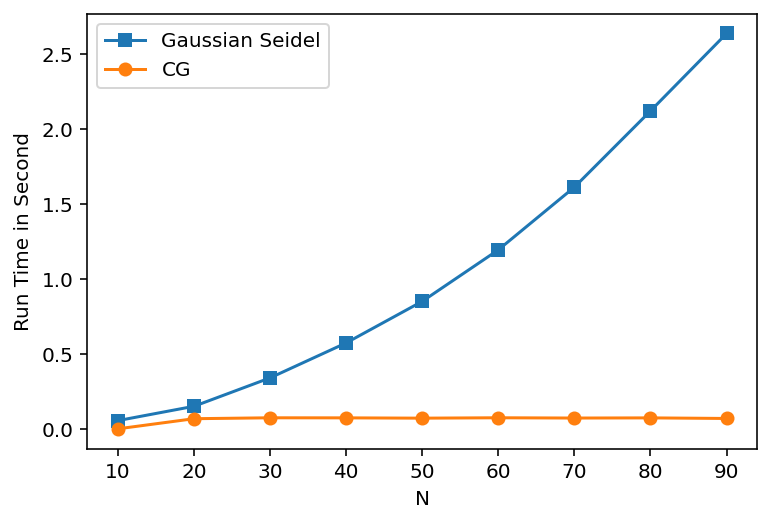

In [7]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.plot(ks, times_naive, 's-', label='Gaussian Seidel')
plt.plot(ks, times_cg, 'o-', label='CG')
plt.xlabel('N')
plt.ylabel('Run Time in Second')
plt.legend(loc='best')
plt.show()

In [16]:
ks = range(10, 400, 20)

times = []

for k in ks:
    print(k, end=' ')
    a, b = random_equation(k, True)
    times.append(time_solve(a, b, False))

10 30 50 70 90 110 130 150 170 190 210 230 250 270 290 310 330 350 370 390 

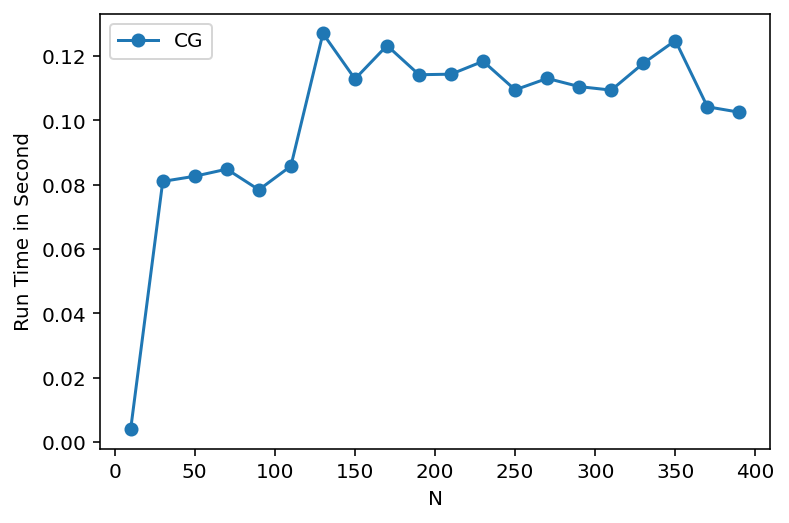

In [17]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.plot(ks, times, 'o-', label='CG')
plt.xlabel('N')
plt.ylabel('Run Time in Second')
plt.legend(loc='best')
plt.show()